<a href="https://colab.research.google.com/github/Lisa-creates/Time-series-analysis/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%A5%D0%BE%D0%BB%D1%8C%D1%82%D0%B0_%D0%92%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D1%81%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from collections import OrderedDict
import matplotlib
from matplotlib import pyplot as plt
from pylab import rcParams

import pandas as pd
import seaborn as sns

import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np


df_orig = pd.read_excel('data (4).xls', parse_dates = True)

n = 4
df = df_orig.iloc[n]
df = pd.DataFrame(df) #, index = x.dropna()
# list(df.columns.values)
df = df[2:]
df = df.rename(columns={n: 'Цены'})

def is_stationarity(df) -> int:
  res = adfuller(df.values)
#  t_stat, p_value_KPSS, _, critical_values = kpss(df, regression='c')
  print('Ряд стационарен?',  res[1] < 0.05, res[1]) #or p_value_KPSS > 0.05)
  df_diff = df
  d = 0
  while res[1] > 0.05: #or p_value_KPSS < 0.05:
    df_diff = df_diff.diff(periods = 12).dropna()
    res = adfuller(df_diff.values)
 #   t_stat, p_value_KPSS, _, critical_values = kpss(df, regression='c')
    d += 1
    print('Augmented Dickey-Fuller Statistic: ', res[0])
    print('p-value:', res[1])
 # print('p-value KPSS:', p_value_KPSS)
  #df_diff = df_diff.diff(periods = 12).dropna()
  # df_diff = df_diff - df_diff.shift(12)
  # df_diff = df_diff.dropna()
  ax = df_diff.plot(figsize = (12,6), legend = None)
  ax.set(xlabel = 'Date', ylabel = 'Price')

  acf_diff = plot_acf(df_diff)
  pacf_diff = plot_pacf(df_diff)

  return d


def print_metric(df_test, forecast_test):
  print('mae ARIMA: ', mean_absolute_error(df_test, forecast_test))
  print('mape ARIMA: ', mean_absolute_percentage_error(np.array(df_test['Цены']), np.array(forecast_test)))
  print('rmse ARIMA: ', np.sqrt(mean_squared_error(df_test['Цены'], forecast_test)))
  print('mse ARIMA:: ', mean_squared_error(df_test['Цены'], forecast_test))


def arr_date(date1, date2) -> list:
  y0 = int( date1.split('-')[0] )
  y1 = int( date2.split('-')[0] )
  m0 = int( date1.split('-')[1] ) - 1
  m1 = int( date2.split('-')[1] ) - 1

  dat = []
  start = m0
  for y in range(y0, y1+1):
      for m in range(start,12):
        if m % 12 + 1 < 10:
          dat.append('0' + str(m  % 12 + 1)+'-'+str(y) )
        else:
          dat.append(str(m % 12 + 1)+'-'+str(y) )

        if y == y1 and (m % 12) == m1:
              break
      start = 0

  return dat

dat = arr_date("2003-01-01", "2023-04-07")


dat = pd.to_datetime(dat, format='%m-%Y')
print(dat)
df['Date'] = dat
df = df.set_index('Date')
df.head()

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01'],
              dtype='datetime64[ns]', length=244, freq=None)


,Цены
Date,
2003-01-01,102.4
2003-02-01,101.63
2003-03-01,101.05
2003-04-01,101.02
2003-05-01,100.8


<Axes: xlabel='Date'>

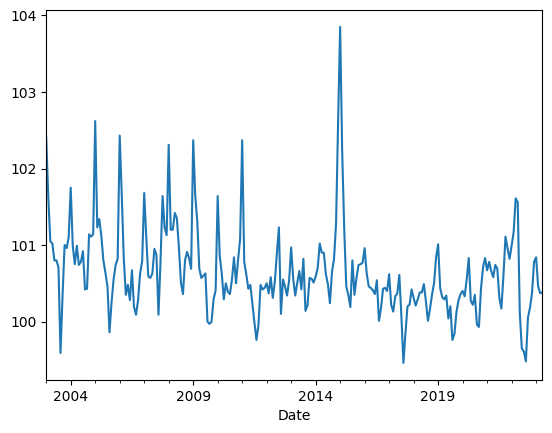

In [ ]:
df['Цены'].plot()

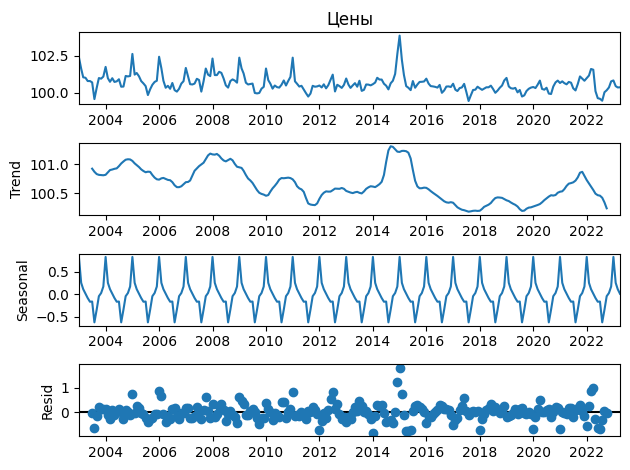

In [ ]:
decompose_result = seasonal_decompose(df['Цены'], model = 'additive') # multiplicative
decompose_result.plot()
plt.show()

In [ ]:
n = 20 # размер тестовой выборки

r = df.shape[0] - n # кол-во строк минус размер тестовой выборки

df_test = df[r:]
df = df[:r]
df['Цены'] = df['Цены'].astype(float)
# df = np.log(df['Цены']).diff()

<ipython-input-5-772f80439b96>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Цены'] = df['Цены'].astype(float)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Цены,No. Observations:,224
Model:,ExponentialSmoothing,SSE,24.501
Optimized:,True,AIC,-467.696
Trend:,None,BIC,-419.933
Seasonal:,Multiplicative,AICC,-465.068
Seasonal Periods:,12,Date:,"Sun, 04 Jun 2023"
Box-Cox:,False,Time:,13:14:26
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8560763,alpha,True
smoothing_seasonal,0.1439237,gamma,True


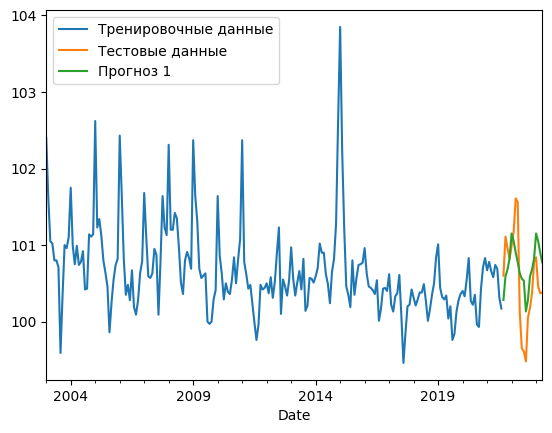

In [ ]:
fitted_model = ExponentialSmoothing(df['Цены'],  seasonal = 'mul', seasonal_periods = 12).fit()
forecast_test = fitted_model.forecast(n) #trend = 'None',trend = 'add',
df['Цены'].plot(legend = True, label = 'Тренировочные данные')
df_test['Цены'].plot(legend = True, label = 'Тестовые данные')
forecast_test.plot(legend = True, label = 'Прогноз 1')



fitted_model.summary()

mae ARIMA:  0.43578044452026105
mape ARIMA:  0.004338839375110083
rmse ARIMA:  0.5092205930963826
mse ARIMA::  0.2593056124334316


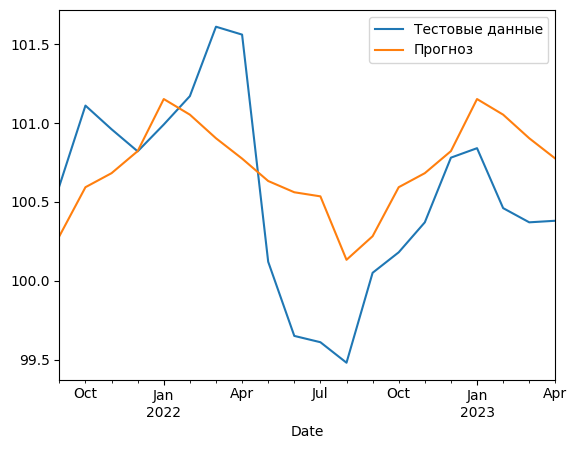

In [ ]:
df_test['Цены'].plot(legend = True, label = 'Тестовые данные')
forecast_test.plot(legend = True, label = 'Прогноз')

print_metric(df_test, forecast_test)

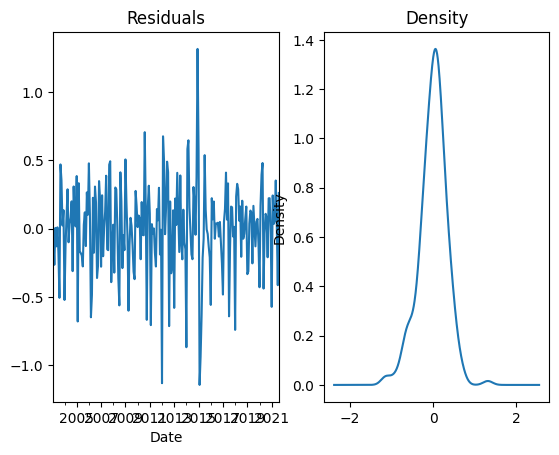

In [ ]:
import matplotlib.pyplot as plt
residuals = fitted_model.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])

# acf_res = plot_acf(residuals)

# pacf_res = plot_pacf(residuals)
plt.show()

https://www.wisdomgeek.com/development/machine-learning/sarima-forecast-seasonal-data-using-python/ - sarima

https://www.helenkapatsa.ru/modiel-kholta-vintiersa/